# 1. 神经网络结构设计与调优
在人工构造的MNIST数据集的子集上进行训练/测试，要求：

（1）参考课件中给出的代码，实现以下两种不同的网络结构（要求用numpy手动实现前向传播和反向传播等过程）：
- 2层前馈网络，激活函数sigmoid或tanh，隐含层维度自定
- 3层前馈网络，激活函数relu，隐含层维度自定

（2）两个网络在测试集上分类准确率均$\ge$85%

（3）画出训练过程中训练集上loss和训练集上accuracy的变化曲线

本次作业可能涉及到的激活函数的定义及其导函数：
- $sigmoid(x)=1/(1+e^{-x})$, 导函数$sigmoid(x)(1-sigmoid(x))$
- $tanh(x)=(e^x-e^{-x})/(e^x+e^{-x})$，导函数$1-tanh^2(x)$
- $relu(x)=max(0,x)$，导函数$f(x)=\begin{cases}1, x>0 \\ 0, x\le0\end{cases}$

（附加）调优上一步实现的网络：
- batch size，iteration
- loss function（MSE，交叉熵……）
- 优化器的参数（学习率，学习率调整策略，优化器类型……）
- 网络权重初始化策略
- 数据预处理/增强

<font color=ff0000> ⚠️截止日期 5.16 中午 11:59，如果做了附加题调优，请在作业中注释出调优部分。⚠️</font>

In [1]:
# 读取训练和测试数据
# 本次作业为加快训练速度，只取1000个样本作为训练集，200个样本作为测试集
# 每个样本原本是28*28的图片，reshape成784维向量输入神经网络
# 只取（形状比较相近的）数字8和数字9两个类，做二分类，并将数字8的label重新标为0，数字9的label重新标为1
# 两个类的训练样本数不均衡（1:3）
# 本部分代码不可修改

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
f = np.load('mnist.npz') 
x_train, y_train = f['x_train'], f['y_train'] 
x_test, y_test = f['x_test'], f['y_test'] 

def get_small_data(x_data, y_data, num1, num2):
    cnt1, cnt2, final_x, final_y = 0, 0, [], []
    for i in range(x_data.shape[0]):
        x = x_data[i, :].reshape(-1).tolist()
        y = y_data[i]
        if y == 8 and cnt1 < num1:
            final_x.append(x)
            final_y.append(0)
            cnt1 += 1
        elif y == 9 and cnt2 < num2:
            final_x.append(x)
            final_y.append(1)
            cnt2 += 1
    return np.array(final_x), np.array(final_y)

x_train, y_train = get_small_data(x_train, y_train, num1=250, num2=750)
x_test, y_test = get_small_data(x_test, y_test, num1=100, num2=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_train=y_train.reshape(-1,1)

(1000, 784)
(1000,)
(200, 784)
(200,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

C:\Users\G1\AppData\Local\Temp/ipykernel_2860/872248959.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch:1,Accuracy:0.512
Epoch:100,Accuracy:0.851
Epoch:200,Accuracy:0.909
Epoch:300,Accuracy:0.924
Epoch:400,Accuracy:0.933
Epoch:500,Accuracy:0.939
Epoch:600,Accuracy:0.94
Epoch:700,Accuracy:0.946
Epoch:800,Accuracy:0.948
Epoch:900,Accuracy:0.946
Epoch:1000,Accuracy:0.948


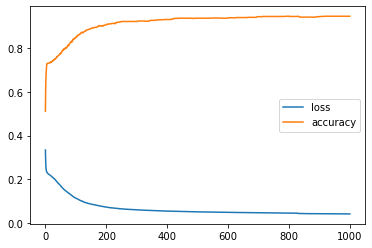

In [10]:

learning_rate=0.001
W1=np.random.uniform(-1,1,size=(784,50))
W2=np.random.uniform(-1,1,size=(50,1))
N=1000
def train(W1,W2,x,y):
    neth=x@W1
    outh=sigmoid(neth)
    neto=outh@W2
    outo=sigmoid(neto)
    #反向传播，采用MSE做loss函数
    pd_neto=(outo-y)*outo*(1-outo)
    pd_W2=outh.T@pd_neto
    pd_outh=pd_neto@W2.T
    pd_neth=pd_outh*outh*(1-outh)
    pd_W1=x.T@pd_neth
    
    W1-=learning_rate*pd_W1
    W2-=learning_rate*pd_W2
    
    loss=np.sum((outo-y)**2)/N
    accuracy=np.sum((outo>=0.5)==y)/N
    return outo,W1,W2,loss,accuracy

loss_=[]
accuracy_=[]
for i in range(1000):
    outo,W1,W2,loss,accuracy=train(W1,W2,x_train,y_train)
    loss_.append(loss)
    accuracy_.append(accuracy)
    if i==0 or (i+1)%100==0:
        print(f'Epoch:{i+1},Accuracy:{accuracy_[-1]}')
plt.plot(loss_)
plt.plot(accuracy_)
plt.legend(['loss','accuracy'])

In [11]:
N=200
y_test=y_test.reshape(-1,1)
neth=x_test@W1
outh=sigmoid(neth)
neto=outh@W2
outo=sigmoid(neto)
accuracy=np.sum((outo>=0.5)==y_test)/N
print(f'Test Accuracy:{accuracy}')

Test Accuracy:0.875


C:\Users\G1\AppData\Local\Temp/ipykernel_2860/872248959.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch:1,Accuracy:0.551
[[  -25.54322571]
 [-1821.84520027]
 [ -222.63031329]]
Epoch:1000,Accuracy:0.957
[[ 2.45472993e+01]
 [-3.56503880e+01]
 [ 5.95458462e-03]]
Epoch:2000,Accuracy:0.96
[[ 1.72326842e+01]
 [-2.48719862e+01]
 [ 8.05014166e-04]]
Epoch:3000,Accuracy:0.96
[[ 14.07125919]
 [-20.14146266]
 [  0.        ]]
Epoch:4000,Accuracy:0.961
[[ 12.19274928]
 [-17.36819632]
 [  0.        ]]


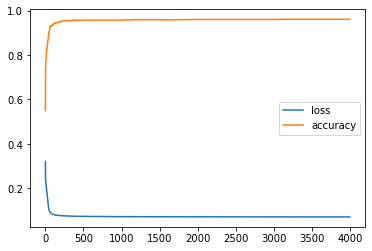

In [20]:
def relu(x):
    return np.maximum(0,x)
def df_relu(x):
    return x>=0
#HE initialization
W1=np.random.randn(784,50)*np.sqrt(2/1000)
W2=np.random.randn(50,3)*np.sqrt(2/500)
W3=np.random.randn(3,1)*np.sqrt(2/500)
x_train=x_train/255

learning_rate=1e-5
N=1000
def train(W1,W2,W3,x,y):
    neth1=x@W1
    outh1=relu(neth1)
    neth2=outh1@W2
    outh2=relu(neth2)
    neto=outh2@W3
    std=np.std(neto)
    neto/=std
    outo=sigmoid(neto)
    #反向传播，采取MSE做loss函数
    #倒数第一层
    pd_neto=(outo-y)*outo*(1-outo)/std
    pd_W3=outh2.T@pd_neto
    #倒数第二层
    pd_outh2=pd_neto@W3.T
    pd_neth2=pd_outh2*df_relu(neth2)
    pd_W2=outh1.T@pd_neth2
    #倒数第三层
    pd_outh1=pd_neth2@W2.T
    pd_neth1=pd_outh1*df_relu(neth1)
    pd_W1=x.T@pd_neth1
    
    W1-=learning_rate*pd_W1
    W2-=learning_rate*pd_W2
    W3-=learning_rate*pd_W3
    loss=np.sum((outo-y)**2)/N
    accuracy=np.sum((outo>=0.5)==y)/N
    return W1,W2,W3,loss,accuracy,pd_W3

loss_=[]
accuracy_=[]
for i in range(4000):
    W1,W2,W3,loss,accuracy,pd_W3=train(W1,W2,W3,x_train,y_train)
    loss_.append(loss)
    accuracy_.append(accuracy)
    if i==0 or (i+1)%1000==0:
        print(f'Epoch:{i+1},Accuracy:{accuracy}')
plt.plot(loss_)
plt.plot(accuracy_)
plt.legend(['loss','accuracy'])
    
   

In [21]:
y_test=y_test.reshape(-1,1)
x_test=x_test/255
N=200
neth1=x_test@W1
outh1=relu(neth1)
neth2=outh1@W2
outh2=relu(neth2)
neto=outh2@W3
outo=sigmoid(neto)
accuracy=np.sum((outo>=0.5)==y_test)/N
print(f'Test Accuracy:{accuracy}')

Test Accuracy:0.85
